# **COMP_Pract_06(Fri 4pm)_Group B**

#Group Members

>Sadia Afreen Anannya |   **44483228**
>Md Safayatul Islam |   **44324049**
>Ahsan Adil Nibir |   **44397836**
>Anika Monjerin Otoshi |  **44522851**

# Summary 
Taxation is one of the most important sources that a government gets paid. Taxation is very important in order to make the economy and businesses grow as it helps to build bridges and roads, provide healthcare services for the citizens of the country and in order to get more and more foureing investments; education relies highly on these internal investment. Thus, we decided to work on this data. 
The goal of our project is to Analyze these data and provide better suggestions for the officials to understand what measures are required to maximize the taxation throughout the country.


# Goals
Our goals are to visualise how numbers of individuals with different interests in rental property are affected around different aspects, e.g. net range position, taxable income range, state/territory or age range etc.

Our goals are to visualise how numbers of individuals with different interests in rental property are affected around different aspects, e.g. net range position, taxable income range, state/territory or age range etc.

- A **regression** and **RFE analysis** and **correlation matrices** of variables such as Taxable income range, income year, age range, state/ territory, number of property interests etc. The distribution of these variables will be observed and the best factors will be selected for further analysis.

- **Trend or Time-Series analysis (ARIMA)** to determine the trend of different factors in a series of particular time period.

- **Heat maps** across the various territories throughout Australia from the dataset to determine the hottest areas (areas with most individuals and magnitude of their interest in rental properties) around the years.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
from matplotlib.pyplot import imread
%matplotlib inline

### Data Import and Cleaning

In [2]:
#table_27a = df_a
dfa = pd.read_excel('table_27a.xlsx',skiprows=2,inplace=True)

In [3]:
dfa.head()

,Income year2,Number of property interests1,Overall net rent outcome3,Number of individuals
0,2000,1 interest,Overall net rent loss,495751
1,2000,2 interests,Overall net rent loss,100345
2,2000,3 interests,Overall net rent loss,23656
3,2000,4 interests,Overall net rent loss,6940
4,2000,5 interests,Overall net rent loss,2550


In [4]:
dfa['Number of property interests1'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [5]:
dfa.head()

,Income year2,Number of property interests1,Overall net rent outcome3,Number of individuals
0,2000,1,Overall net rent loss,495751
1,2000,2,Overall net rent loss,100345
2,2000,3,Overall net rent loss,23656
3,2000,4,Overall net rent loss,6940
4,2000,5,Overall net rent loss,2550


In [6]:
dfa['Number of property interests1'] = dfa['Number of property interests1'].astype(int)

In [8]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
Income year2                     216 non-null int64
Number of property interests1    216 non-null int32
Overall net rent outcome3        216 non-null object
Number of individuals            216 non-null int64
dtypes: int32(1), int64(2), object(1)
memory usage: 6.0+ KB


In [10]:
dfa.describe()

,Income year2,Number of property interests1,Number of individuals
count,216.000000,216.000000,216.000000
mean,2008.500000,3.500000,137781.106481
std,5.200179,1.711792,230177.876061
min,2000.000000,1.000000,2193.000000
25%,2004.000000,2.000000,8943.250000
50%,2008.500000,3.500000,26375.500000
75%,2013.000000,5.000000,142851.000000
max,2017.000000,6.000000,929961.000000


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [11]:
sns.set_palette("husl")
sns.set_style('whitegrid')

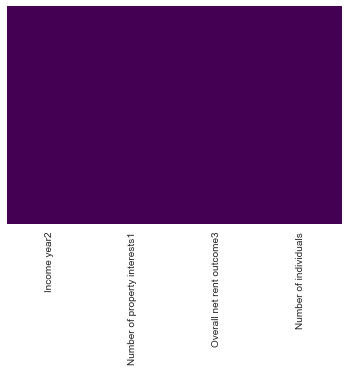

In [12]:
sns.heatmap(dfa.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since No data is missing we can continue to further analysis

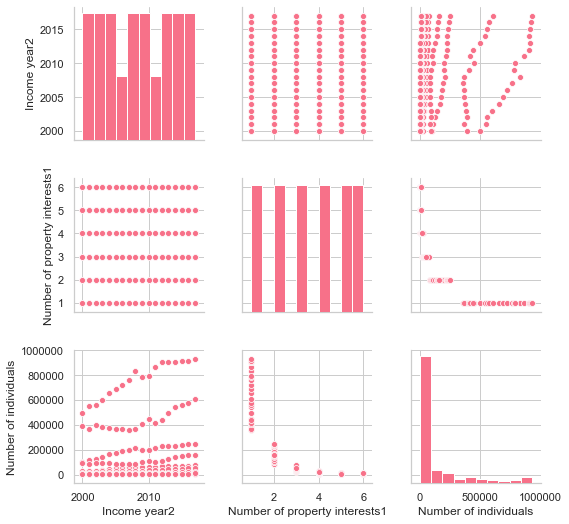

In [73]:
sns.set_palette("husl")
sns.set_style('whitegrid')
sns.pairplot(dfa)


### Correlation HeatMap of the data

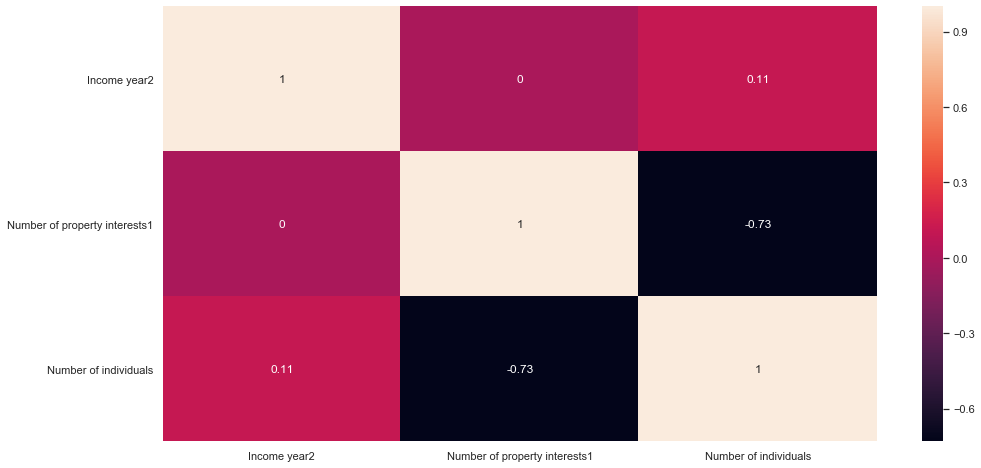

In [58]:
sns.heatmap(dfa.corr(), annot = True)

In [13]:
dfa.columns

Index(['Income year2', 'Number of property interests1',
       'Overall net rent outcome3', 'Number of individuals'],
      dtype='object')

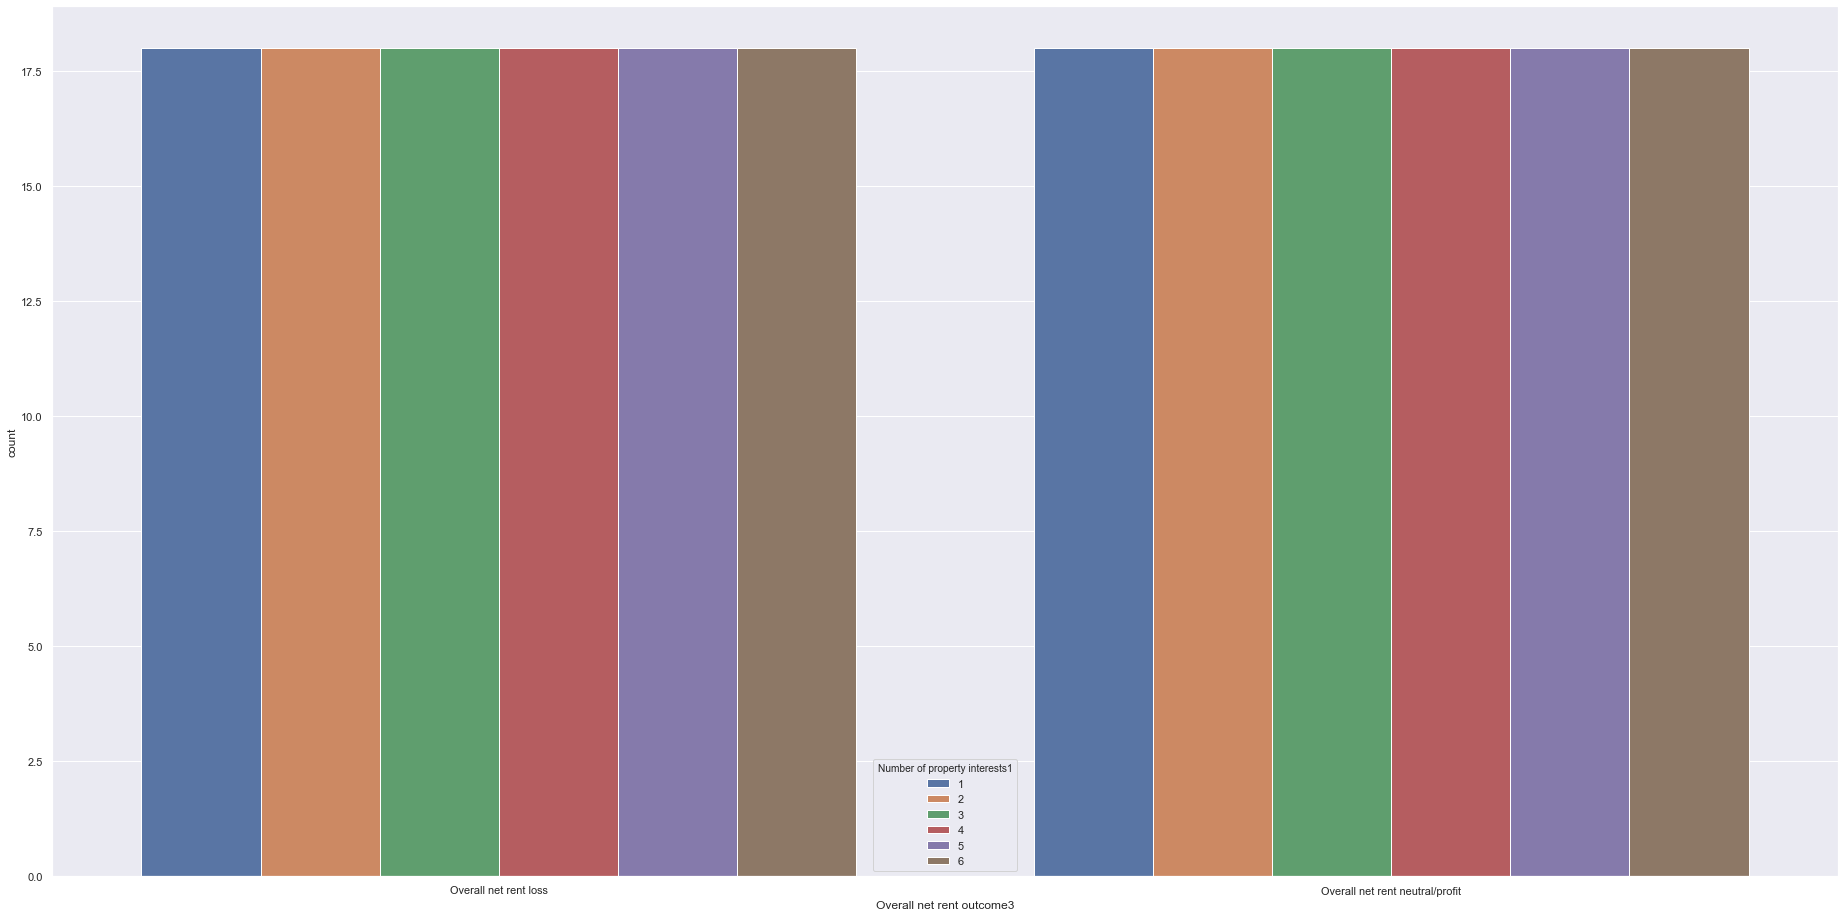

In [39]:
sns.countplot(x='Overall net rent outcome3',hue='Number of property interests1',data=dfa)
sns.set(rc={'figure.figsize':(32,16)})

In [40]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

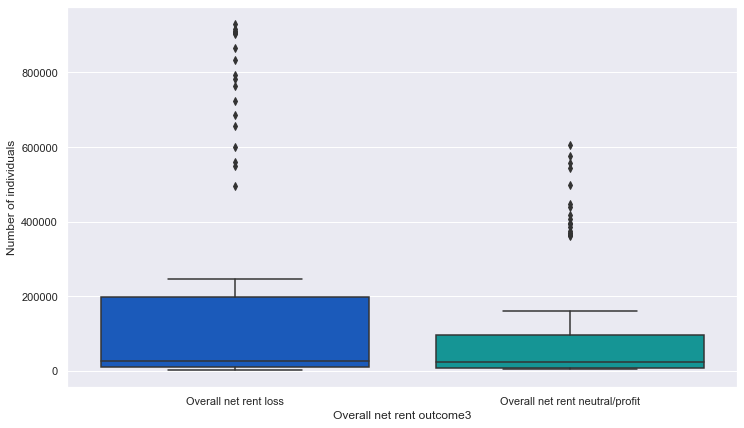

In [41]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Overall net rent outcome3',y='Number of individuals',data=dfa,palette='winter')
sns.set(rc={'figure.figsize':(22,14)})

In [42]:
dfa.columns

Index(['Income year2', 'Number of property interests1',
       'Overall net rent outcome3', 'Number of individuals'],
      dtype='object')

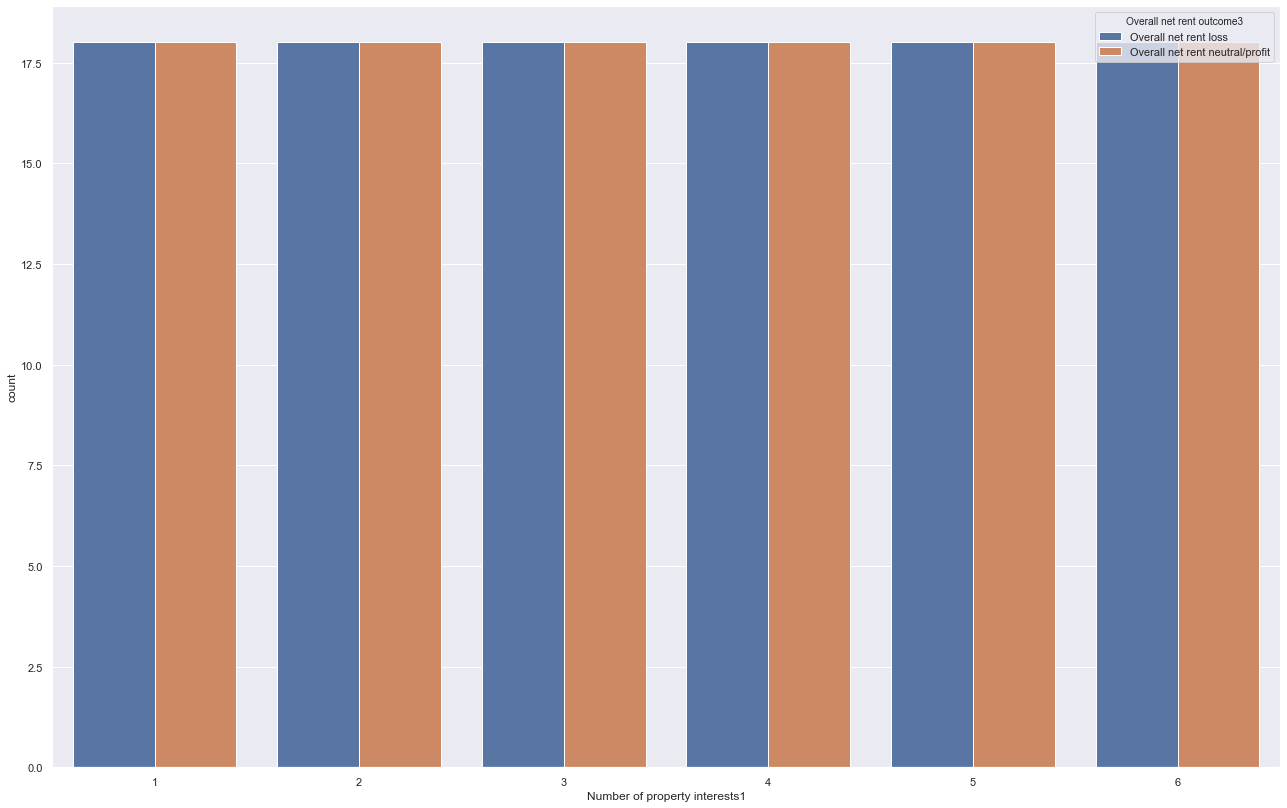

In [43]:
sns.countplot(x='Number of property interests1',hue='Overall net rent outcome3',data=dfa)
sns.set(rc={'figure.figsize':(16,8)})

In [46]:
dfa.head()

,Income year2,Number of property interests1,Overall net rent outcome3,Number of individuals
0,2000,1,Overall net rent loss,495751
1,2000,2,Overall net rent loss,100345
2,2000,3,Overall net rent loss,23656
3,2000,4,Overall net rent loss,6940
4,2000,5,Overall net rent loss,2550


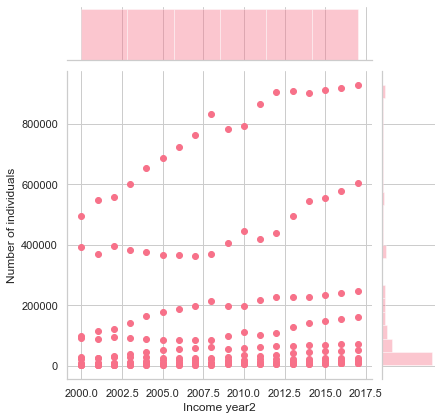

In [47]:
sns.jointplot(data=dfa, x='Income year2', y='Number of individuals')

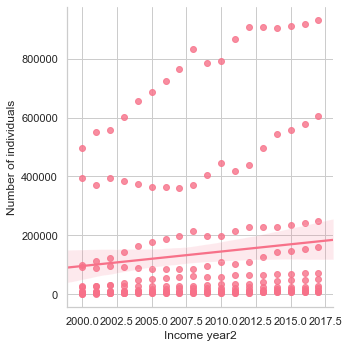

In [48]:
sns.lmplot(data=dfa,x='Income year2',y='Number of individuals')

# Filtering by Overall Net Rent Outcome

In [50]:
#filtering by Overall Net Rent Outcome
dfa_onrt = dfa.loc[dfa['Overall net rent outcome3'] == 'Overall net rent loss']

### Overall net rent outcome = Overall net rent loss

In [52]:
dfa_onrt

,Income year2,Number of property interests1,Overall net rent outcome3,Number of individuals
0,2000,1,Overall net rent loss,495751
1,2000,2,Overall net rent loss,100345
2,2000,3,Overall net rent loss,23656
3,2000,4,Overall net rent loss,6940
4,2000,5,Overall net rent loss,2550
...,...,...,...,...
205,2017,2,Overall net rent loss,247312
206,2017,3,Overall net rent loss,73893
207,2017,4,Overall net rent loss,26703
208,2017,5,Overall net rent loss,11126


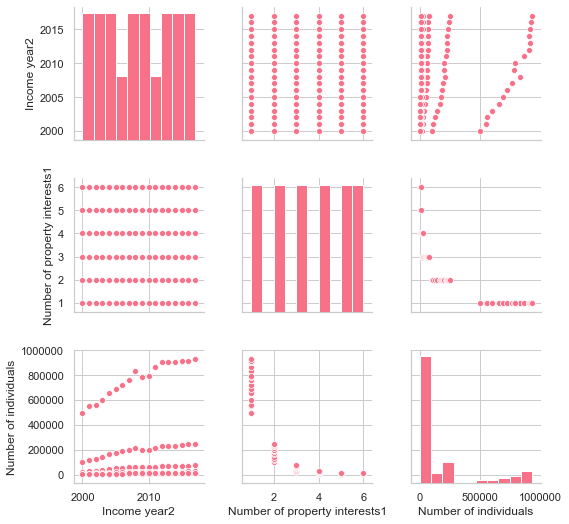

In [53]:
sns.pairplot(dfa_onrt)

### Correlation HeatMap of the filtered data

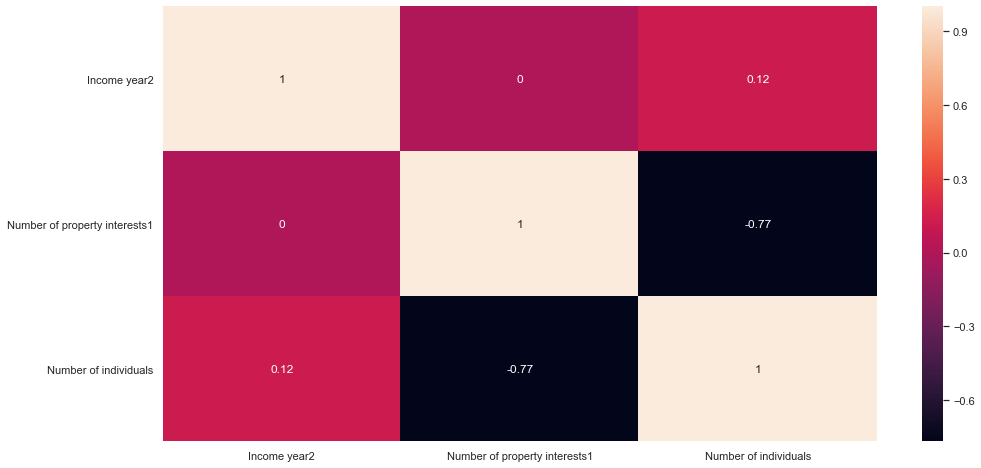

In [54]:
sns.heatmap(dfa_onrt.corr(), annot = True)

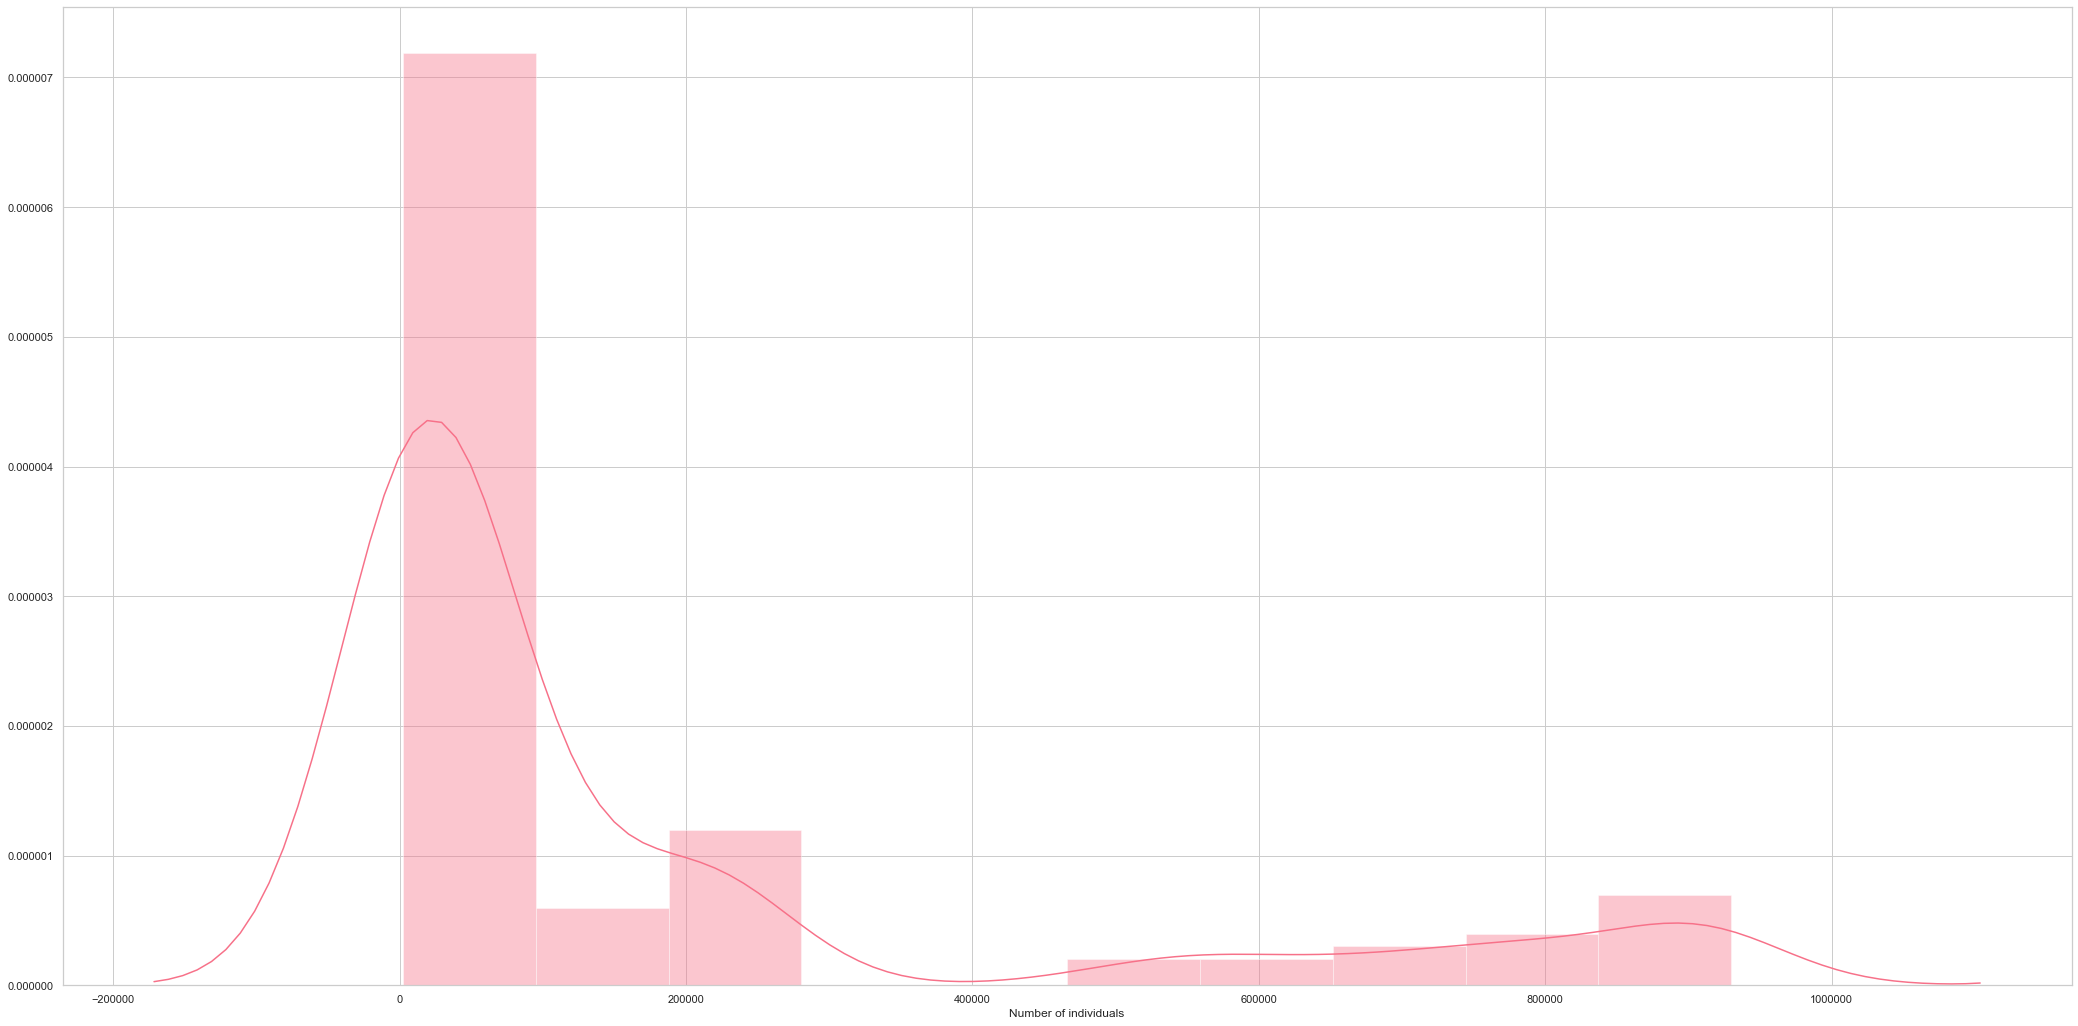

In [63]:
sns.distplot(dfa_onrt['Number of individuals'], bins=10)

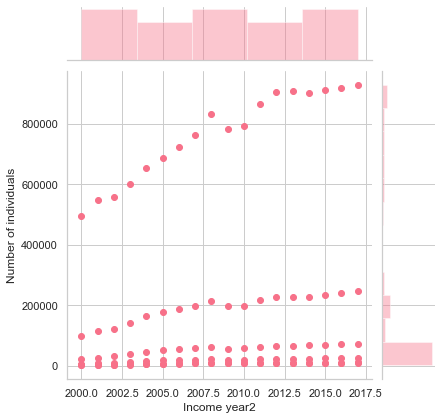

In [64]:
sns.jointplot(data=dfa_onrt, x='Income year2', y='Number of individuals')

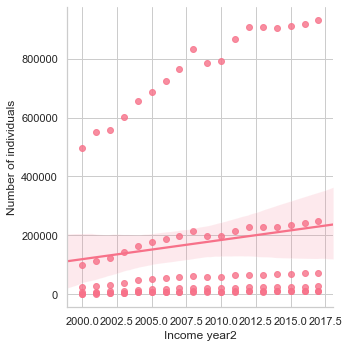

In [65]:
sns.lmplot(data=dfa_onrt, x='Income year2', y='Number of individuals')

### Linear Regression (Predicting number of individuals)

In [67]:
X = dfa_onrt[['Income year2', 'Number of property interests1']]
y = dfa_onrt[['Number of individuals']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#creating and training the model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

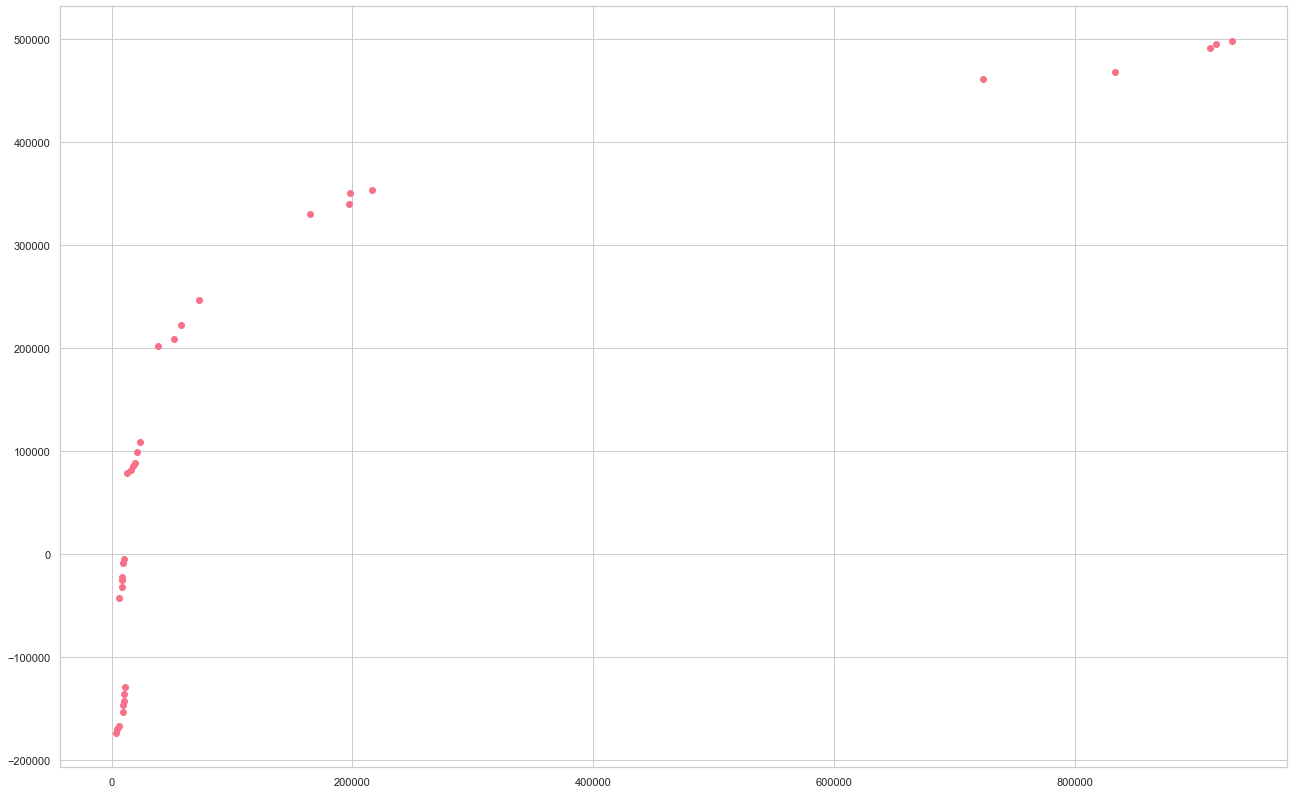

In [76]:
#prediction
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)


### Model Evaluation 

In [77]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 153431.94995618644
MSE: 36001408977.6214
RMSE: 189740.37255582007


## Selecting and analyzing who has number of property interest = 1 

In [82]:
#Selecting who have number of property interst = 1
dfa_onrt1= dfa_onrt.loc[dfa_onrt['Number of property interests1'] == 1]

In [83]:
dfa_onrt1.head()

,Income year2,Number of property interests1,Overall net rent outcome3,Number of individuals
0,2000,1,Overall net rent loss,495751
12,2001,1,Overall net rent loss,549300
24,2002,1,Overall net rent loss,559060
36,2003,1,Overall net rent loss,600389
48,2004,1,Overall net rent loss,655749


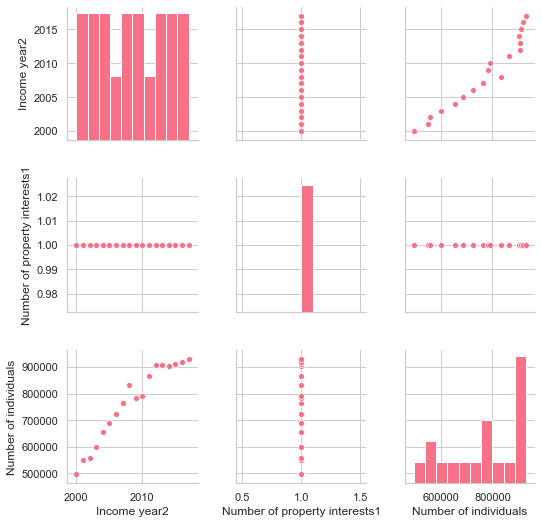

In [84]:
sns.pairplot(dfa_onrt1)

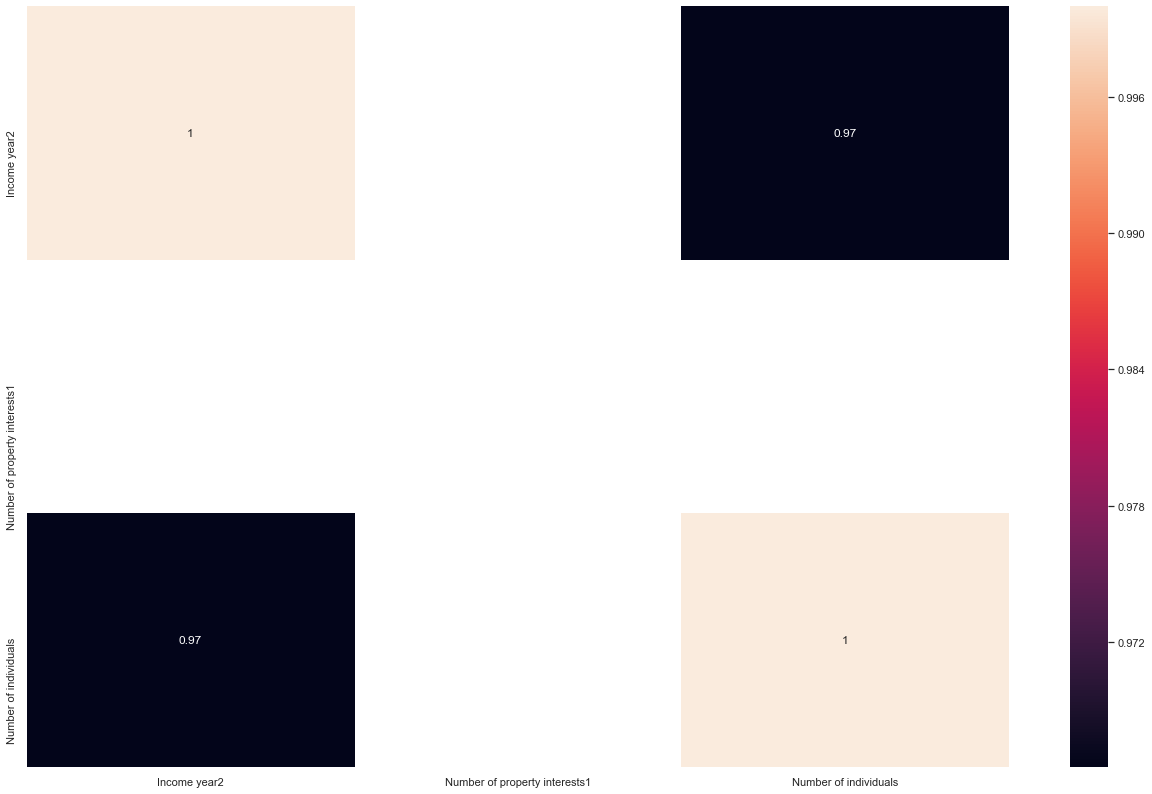

In [85]:
sns.heatmap(dfa_onrt1.corr(), annot = True)

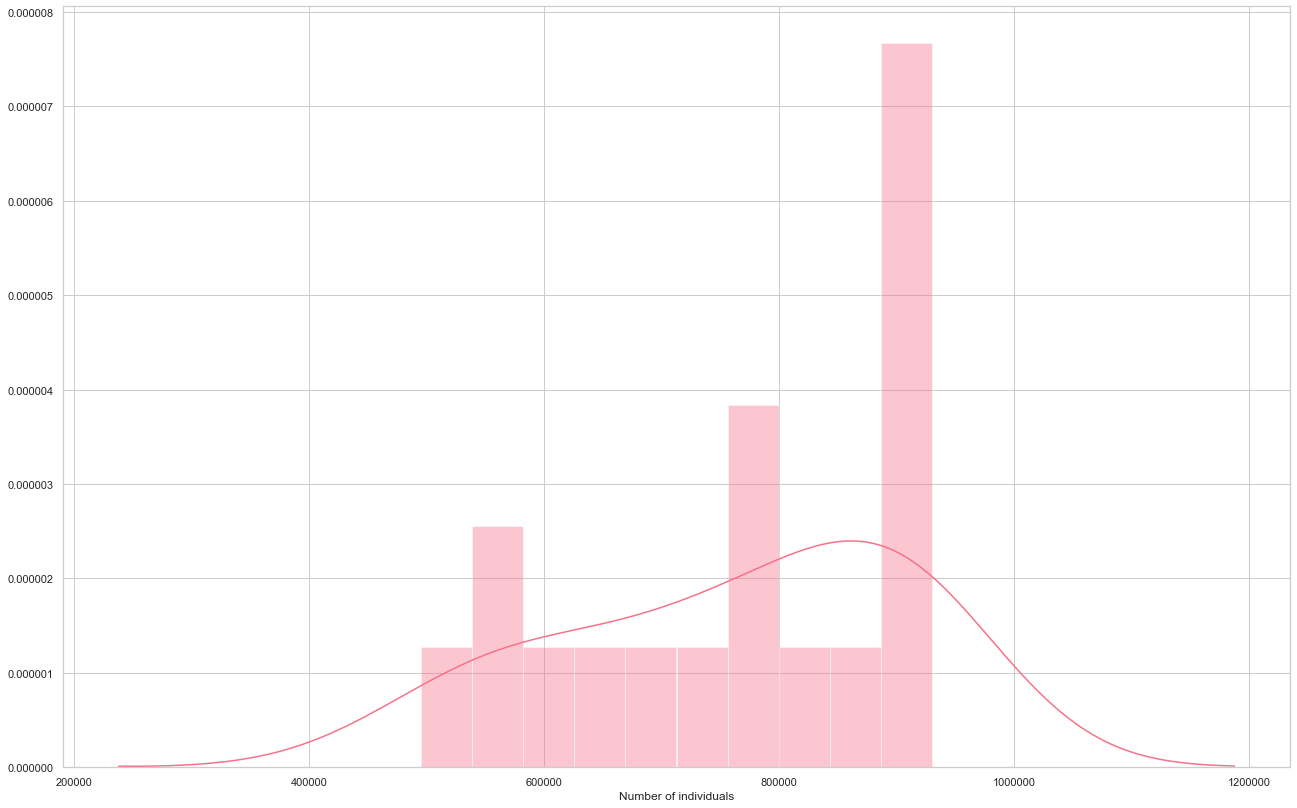

In [86]:
sns.distplot(dfa_onrt1['Number of individuals'], bins=10)

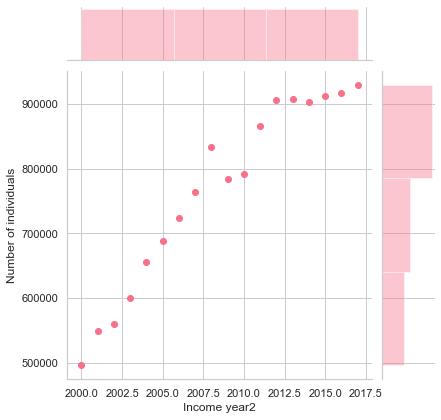

In [87]:
sns.jointplot(data=dfa_onrt1, x='Income year2', y='Number of individuals')

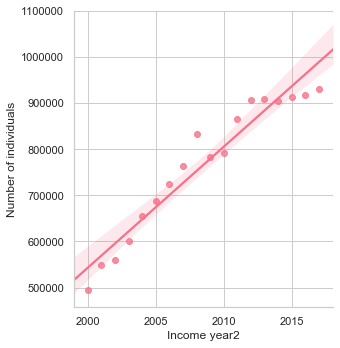

In [88]:
sns.lmplot(data=dfa_onrt1, x='Income year2', y='Number of individuals')

In [89]:
dfa_onrt1.head()

,Income year2,Number of property interests1,Overall net rent outcome3,Number of individuals
0,2000,1,Overall net rent loss,495751
12,2001,1,Overall net rent loss,549300
24,2002,1,Overall net rent loss,559060
36,2003,1,Overall net rent loss,600389
48,2004,1,Overall net rent loss,655749


In [90]:
#Saving dfa_onrt1 data frame as csv file to working with ARMA and ARIMA
dfa_onrt1.to_csv('onart1.csv', encoding='utf-8', index=False)

## ARMA and ARIMA 

In [91]:
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

D:\Ana3\envs\tf_gpu4\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Ana3\envs\tf_gpu4\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [92]:
#Loading the file we saved
dfa_onrt1_a = pd.read_csv('onart1.csv',index_col ='Income year2',parse_dates = True)
dfa_onrt1_a.index.freq = 'YS'

In [2]:
#dfa_onrt1_a.head()

### ARMA

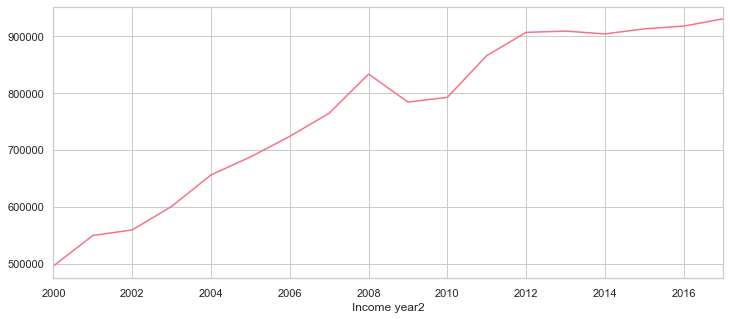

In [93]:
dfa_onrt1_a['Number of individuals'].plot(figsize=(12,5))

In [94]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### Run the augmented Dickey-Fuller Test to confirm stationarity

In [95]:
adf_test(dfa_onrt1_a['Number of individuals'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.696194e+01
p-value                 9.294389e-30
# lags used             7.000000e+00
# observations          1.000000e+01
critical value (1%)    -4.331573e+00
critical value (5%)    -3.232950e+00
critical value (10%)   -2.748700e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Determine the (p,q) ARMA Orders using <tt>pmdarima.auto_arima</tt>

In [96]:
auto_arima(dfa_onrt1_a['Number of individuals'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   17
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -199.300
Method:                           css   S.D. of innovations          29870.275
Date:                Thu, 31 Oct 2019   AIC                            402.601
Time:                        19:52:45   BIC                            404.267
Sample:                             1   HQIC                           402.767
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.554e+04   7244.606      3.526      0.003    1.13e+04    3.97e+04
==============================================================================
"""

In [100]:
len(dfa_onrt1_a)

18

In [102]:
# Set 5 years for testing (25 %) 
train = dfa_onrt1_a.iloc[:13]
test = dfa_onrt1_a.iloc[13:]

In [103]:
train.head()

,Number of property interests1,Overall net rent outcome3,Number of individuals
Income year2,,,
2000-01-01,1,Overall net rent loss,495751
2001-01-01,1,Overall net rent loss,549300
2002-01-01,1,Overall net rent loss,559060
2003-01-01,1,Overall net rent loss,600389
2004-01-01,1,Overall net rent loss,655749


In [104]:
columns = ['Number of property interests1', 'Overall net rent outcome3']

In [105]:
test = test.drop(columns, axis=1)
train = train.drop(columns, axis=1)

In [106]:
train.head() #2 unused columns dropped  

,Number of individuals
Income year2,
2000-01-01,495751
2001-01-01,549300
2002-01-01,559060
2003-01-01,600389
2004-01-01,655749


In [107]:
model = ARMA(train['Number of individuals'],order=(0,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                               
=================================================================================
Dep. Variable:     Number of individuals   No. Observations:                   13
Model:                        ARMA(0, 1)   Log Likelihood                -165.410
Method:                          css-mle   S.D. of innovations          73380.251
Date:                   Thu, 31 Oct 2019   AIC                            336.820
Time:                           19:58:10   BIC                            338.515
Sample:                       01-01-2000   HQIC                           336.472
                            - 01-01-2012                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        7.098e+05   3.92e+04     18.097      0.000    6.33e+05    7.87e+05
ma.L1.Number of individuals     1.0000      0.259      3.865      0.003       0.493       1.507
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

### Obtain 3 years worth of predicted values

In [108]:
start=len(train)
end=len(train)+len(test)-1

In [109]:
predictions = results.predict(start=start, end=end).rename('ARMA(0,1) Predictions')

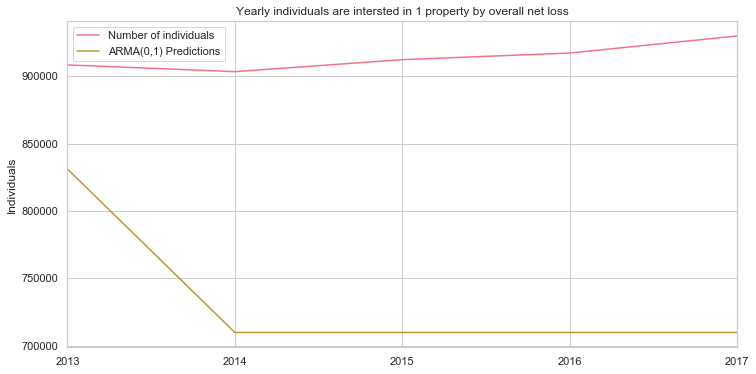

In [110]:
title = 'Yearly individuals are intersted in 1 property by overall net loss'
ylabel='Individuals'
xlabel='' # we don't really need a label here

ax = test['Number of individuals'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True,)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Autoregressive Integrated Moving Average - ARIMA(p,d,q)
The steps are the same as for ARMA(p,q), except that we'll apply a differencing component to make the dataset stationary.<br>
First let's take a look at the <em>dfa_onrt1_a</em> dataset.
### Plot the Source Data

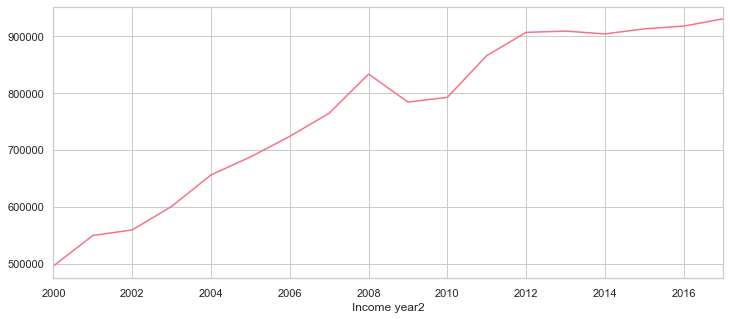

In [111]:
dfa_onrt1_a['Number of individuals'].plot(figsize=(12,5))

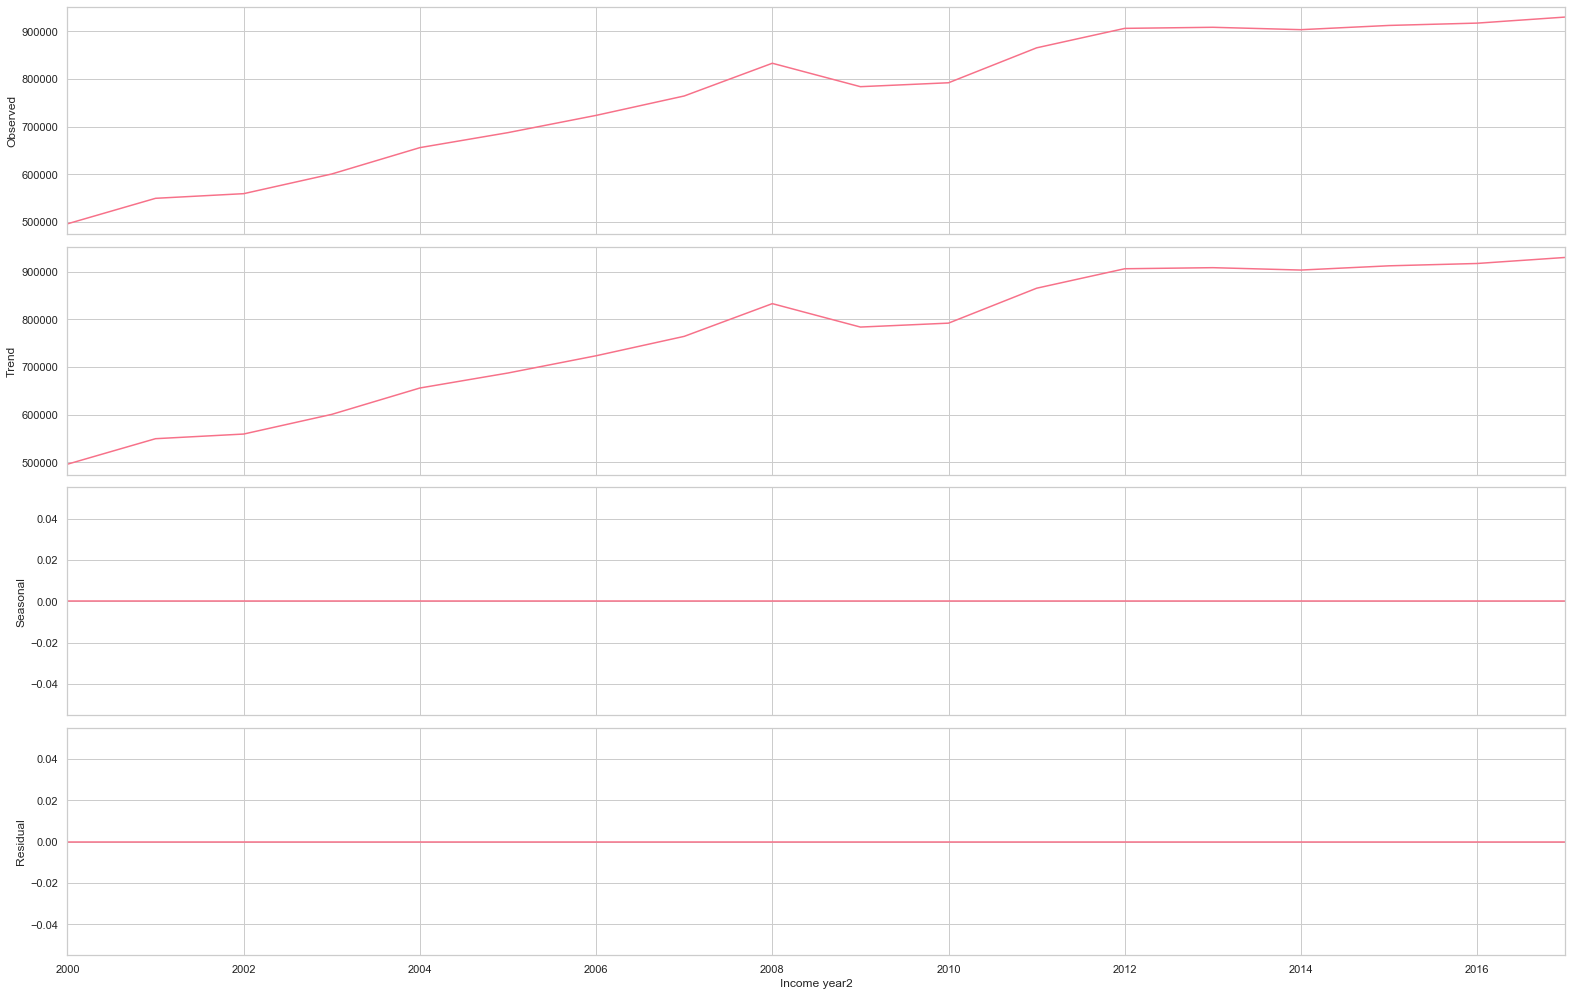

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dfa_onrt1_a['Number of individuals'], model='additive')  # model='add' also works
result.plot();

No seasonality found!

In [114]:
auto_arima(dfa_onrt1_a['Number of individuals'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   17
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -199.300
Method:                           css   S.D. of innovations          29870.275
Date:                Thu, 31 Oct 2019   AIC                            402.601
Time:                        20:04:11   BIC                            404.267
Sample:                             1   HQIC                           402.767
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.554e+04   7244.606      3.526      0.003    1.13e+04    3.97e+04
==============================================================================
"""

In [115]:
from statsmodels.tsa.statespace.tools import diff
dfa_onrt1_a['d1'] = diff(dfa_onrt1_a['Number of individuals'],k_diff=1)

In [116]:
adf_test(dfa_onrt1_a['d1'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.450387
p-value                  0.009357
# lags used              1.000000
# observations          15.000000
critical value (1%)     -3.964443
critical value (5%)     -3.084908
critical value (10%)    -2.681814
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


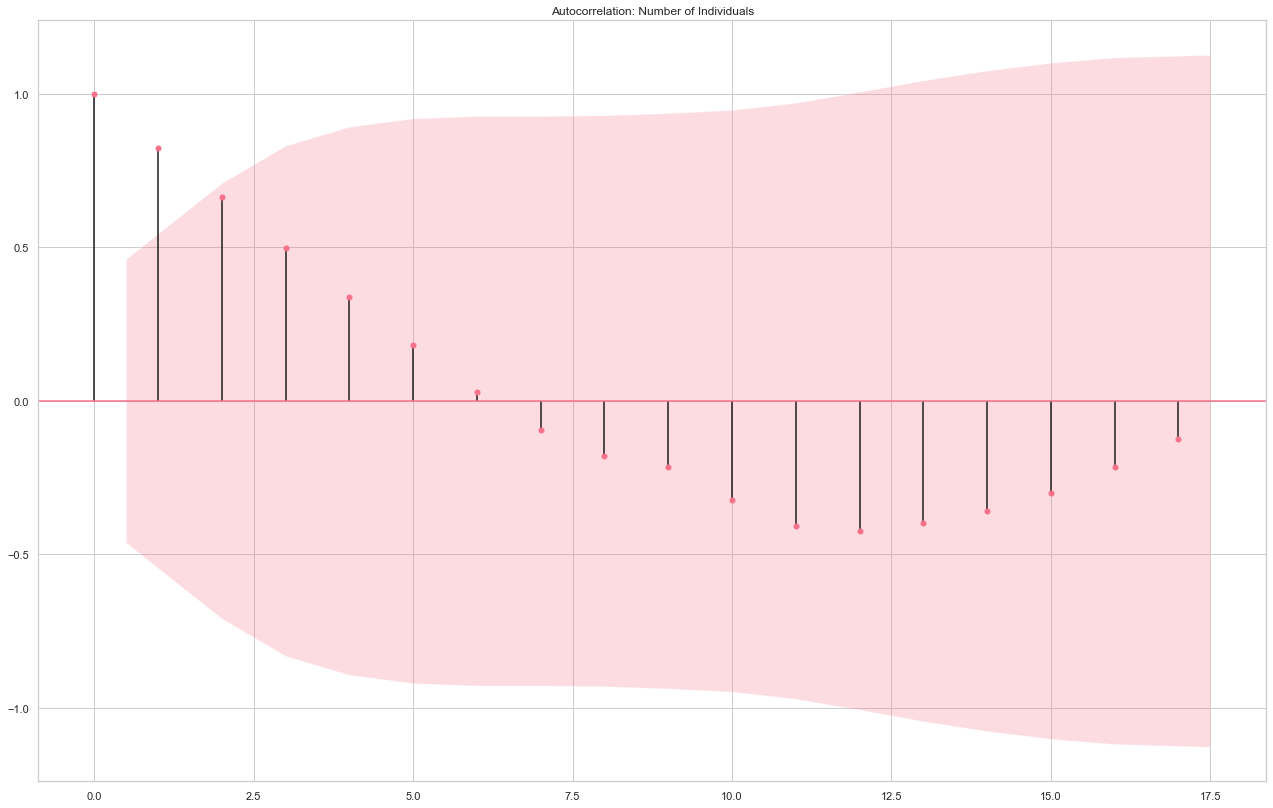

In [117]:
title = 'Autocorrelation: Number of Individuals'
lags = 17
plot_acf(dfa_onrt1_a['Number of individuals'],title=title,lags=lags);

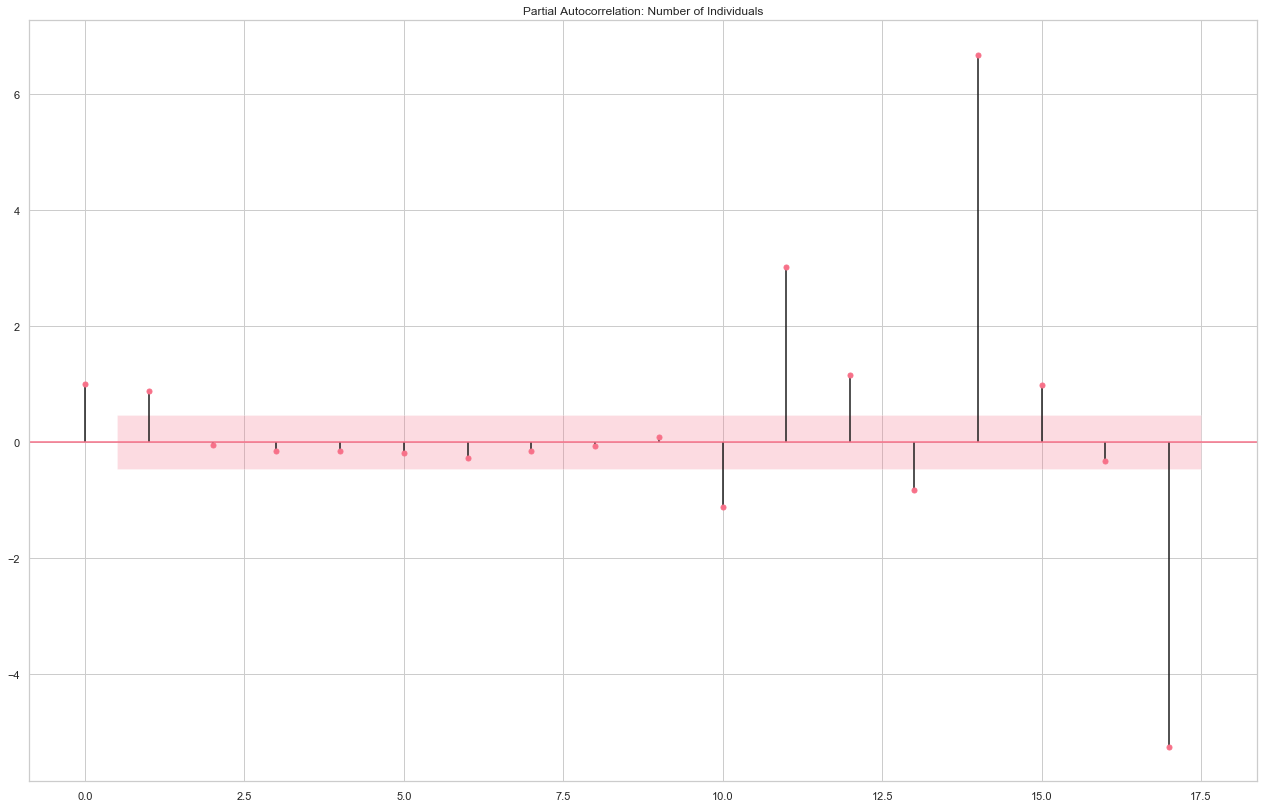

In [118]:
title = 'Partial Autocorrelation: Number of Individuals'
lags = 17
plot_pacf(dfa_onrt1_a['Number of individuals'],title=title,lags=lags);

In [119]:
stepwise_fit = auto_arima(dfa_onrt1_a['Number of individuals'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=402.601, BIC=404.267, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=404.595, BIC=407.095, Fit time=0.059 seconds
Fit ARIMA: order=(0, 1, 1); AIC=404.582, BIC=407.082, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 1); AIC=405.392, BIC=408.725, Fit time=0.104 seconds
Total fit time: 0.184 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   17
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -199.300
Method:                           css   S.D. of innovations          29870.275
Date:                Thu, 31 Oct 2019   AIC                            402.601
Time:                        20:08:11   BIC                            404.267
Sample:                             1   HQIC                           402.767
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.554e+04   7244.606      3.526      0.003    1.13e+04    3.97e+04
==============================================================================
"""

Looks good from here! Now let's train & test the ARIMA(0,1,0) model, evaluate it, then produce a forecast of future values.
### Split the data into train/test sets

In [121]:
# Set 5 year for testing
train = dfa_onrt1_a.iloc[:13]
test = dfa_onrt1_a.iloc[13:]

In [122]:
columns = ['Number of property interests1', 'Overall net rent outcome3','d1']
test = test.drop(columns, axis=1)
train = train.drop(columns, axis=1)

In [123]:
train = train.astype('float32')
test = test.astype('float32')

### Fit an ARIMA(0,1,0) Model

In [124]:
model = ARIMA(train['Number of individuals'],order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                
===================================================================================
Dep. Variable:     D.Number of individuals   No. Observations:                   12
Model:                      ARIMA(0, 1, 0)   Log Likelihood                -141.329
Method:                                css   S.D. of innovations          31522.906
Date:                     Thu, 31 Oct 2019   AIC                            286.658
Time:                             20:10:53   BIC                            287.628
Sample:                         01-01-2001   HQIC                           286.299
                              - 01-01-2012                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.421e+04   9099.879      3.759      0.003    1.64e+04     5.2e+04
==============================================================================
"""

In [125]:
start = len(train)
end = len(train) + len(test) -1

In [126]:
predictions = results.predict(start= start, end = end, typ = 'levels').rename('ARIMA(0,1,0) Predictions')

In [127]:
predictions

2013-01-01    9.404182e+05
2014-01-01    9.746233e+05
2015-01-01    1.008828e+06
2016-01-01    1.043034e+06
2017-01-01    1.077239e+06
Freq: AS-JAN, Name: ARIMA(0,1,0) Predictions, dtype: float64

[Text(0, 0.5, 'individuals number'), Text(0.5, 0, '')]

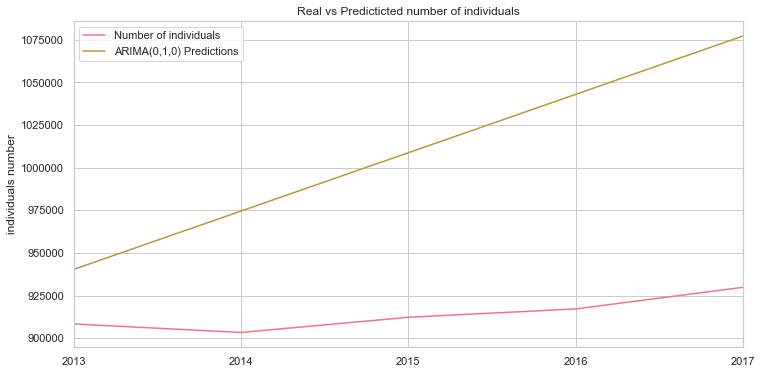

In [128]:
# Plot predictions against known values
title = 'Real vs Predicticted number of individuals'
ylabel='individuals number'
xlabel='' # we don't really need a label here

ax = test['Number of individuals'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [129]:
test['Number of individuals'].mean()

914311.6

In [130]:
predictions.mean()

1008828.5

### Evaluate the Model

In [131]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Number of individuals'], predictions)
print(f'ARIMA(0,1,0) MSE Error: {error:11.10}')

ARIMA(0,1,0) MSE Error: 1.057834328e+10


In [132]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Number of individuals'], predictions)
print(f'ARIMA(0,1,0) RMSE Error: {error:11.10}')

ARIMA(0,1,0) RMSE Error: 102851.0733


### Retraining the model on the full data, and forecast the future

In [134]:
columns = ['Number of property interests1', 'Overall net rent outcome3','d1']
dfa_onrt1_a = dfa_onrt1_a.drop(columns, axis=1)

In [151]:
model3 = ARIMA(dfa_onrt1_a['Number of individuals'],order=(0,1,0))

In [152]:
dfa_onrt1_a.head()

,Number of individuals
Income year2,
2000-01-01,495751.0
2001-01-01,549300.0
2002-01-01,559060.0
2003-01-01,600389.0
2004-01-01,655749.0


In [153]:
dfa_onrt1_a = dfa_onrt1_a.astype('float64')

In [154]:
results2 = model3.fit()

In [155]:
fcast = results2.predict(len(dfa_onrt1_a),len(dfa_onrt1_a)+4,typ='levels').rename('ARIMA(0,1,0) Forecast')

[Text(0, 0.5, 'Individuals'), Text(0.5, 0, '')]

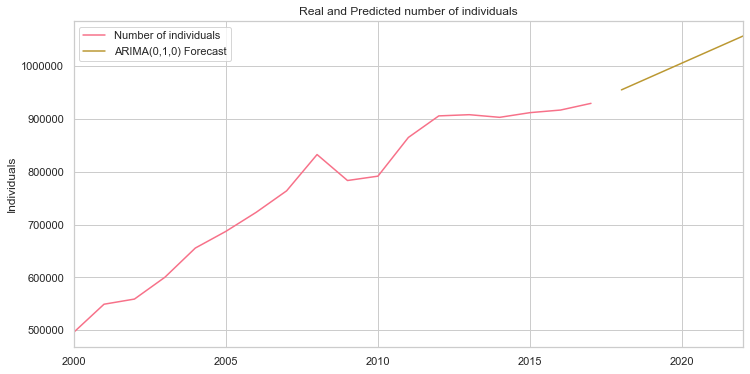

In [156]:
# Plot predictions against known values
title = 'Real and Predicted number of individuals'
ylabel='Individuals'
#xlabel='' # we don't really need a label here

ax = dfa_onrt1_a['Number of individuals'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [157]:
dfa_onrt1.columns

Index(['Income year2', 'Number of property interests1',
       'Overall net rent outcome3', 'Number of individuals'],
      dtype='object')

## Linear Regression
appliying linerar regression on the data(dfa_onrt1) to predict number of individuals in future years

In [160]:
X = dfa_onrt1[['Income year2', 'Number of property interests1']]
y = dfa_onrt1[['Number of individuals']]

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#creating and training the model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction

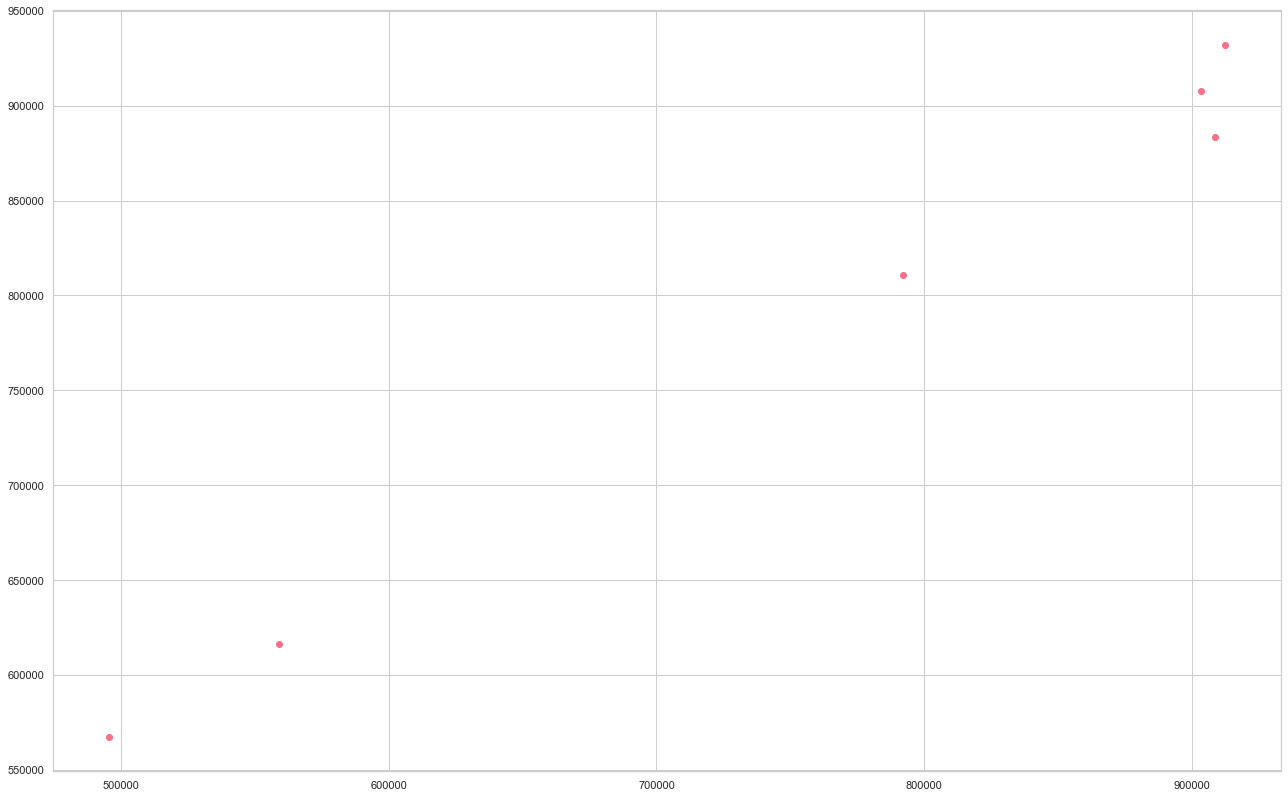

In [162]:
predictions = lm.predict(X_test);
plt.scatter(y_test,predictions);

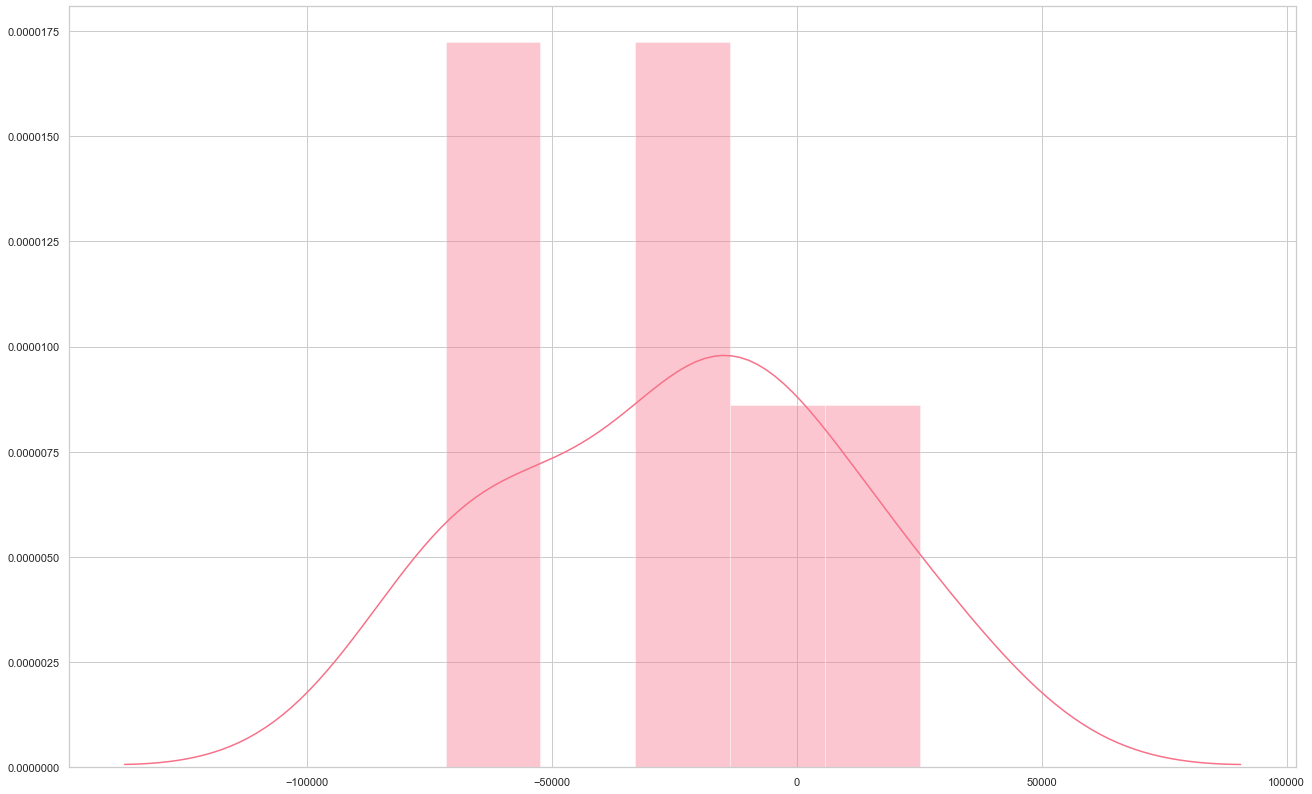

In [163]:
sns.distplot((y_test-predictions),bins=5);

### Model Evaluation

In [164]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 32710.192190823454
MSE: 1628564421.6051865
RMSE: 40355.47573260891


# KNN to Predict Number of Property Interest

In [165]:
dfa.head()

,Income year2,Number of property interests1,Overall net rent outcome3,Number of individuals
0,2000,1,Overall net rent loss,495751
1,2000,2,Overall net rent loss,100345
2,2000,3,Overall net rent loss,23656
3,2000,4,Overall net rent loss,6940
4,2000,5,Overall net rent loss,2550


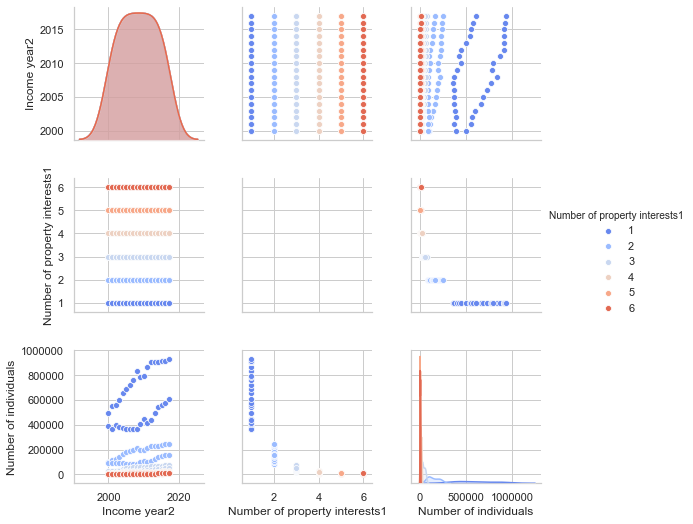

In [166]:
sns.pairplot(dfa,hue='Number of property interests1',palette='coolwarm')

### Getting dummy data for Overall Net Rent outcome  to train the model

In [168]:
dfa_dummy = pd.get_dummies(dfa)

In [169]:
dfa_dummy.head()

,Income year2,Number of property interests1,Number of individuals,Overall net rent outcome3_Overall net rent loss,Overall net rent outcome3_Overall net rent neutral/profit
0,2000,1,495751,1,0
1,2000,2,100345,1,0
2,2000,3,23656,1,0
3,2000,4,6940,1,0
4,2000,5,2550,1,0


### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [171]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(dfa_dummy.drop('Number of property interests1',axis=1))
scaled_features = scaler.transform(dfa_dummy.drop('Number of property interests1',axis=1))


In [172]:
scaled_features

array([[-1.63835604,  1.55880062,  1.        , -1.        ],
       [-1.63835604, -0.16301769,  1.        , -1.        ],
       [-1.63835604, -0.49696438,  1.        , -1.        ],
       [-1.63835604, -0.56975517,  1.        , -1.        ],
       [-1.63835604, -0.58887168,  1.        , -1.        ],
       [-1.63835604, -0.59042626,  1.        , -1.        ],
       [-1.63835604,  1.11340338, -1.        ,  1.        ],
       [-1.63835604, -0.19345605, -1.        ,  1.        ],
       [-1.63835604, -0.47832687, -1.        ,  1.        ],
       [-1.63835604, -0.5557901 , -1.        ,  1.        ],
       [-1.63835604, -0.58289723, -1.        ,  1.        ],
       [-1.63835604, -0.58410779, -1.        ,  1.        ],
       [-1.44560827,  1.79198284,  1.        , -1.        ],
       [-1.44560827, -0.10381748,  1.        , -1.        ],
       [-1.44560827, -0.48043013,  1.        , -1.        ],
       [-1.44560827, -0.56354993,  1.        , -1.        ],
       [-1.44560827, -0.

In [173]:
#Rearranging columns to fit into the model
dfa_dummy = dfa_dummy[['Income year2', 'Number of individuals', 'Overall net rent outcome3_Overall net rent loss','Overall net rent outcome3_Overall net rent neutral/profit','Number of property interests1']]

In [174]:
dfa_dummy.head()

,Income year2,Number of individuals,Overall net rent outcome3_Overall net rent loss,Overall net rent outcome3_Overall net rent neutral/profit,Number of property interests1
0,2000,495751,1,0,1
1,2000,100345,1,0,2
2,2000,23656,1,0,3
3,2000,6940,1,0,4
4,2000,2550,1,0,5


In [175]:
df_feat = pd.DataFrame(scaled_features,columns=dfa_dummy.columns[:-1])
df_feat.head()

,Income year2,Number of individuals,Overall net rent outcome3_Overall net rent loss,Overall net rent outcome3_Overall net rent neutral/profit
0,-1.638356,1.558801,1.0,-1.0
1,-1.638356,-0.163018,1.0,-1.0
2,-1.638356,-0.496964,1.0,-1.0
3,-1.638356,-0.569755,1.0,-1.0
4,-1.638356,-0.588872,1.0,-1.0


### Train Test Split

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,dfa_dummy['Number of property interests1'],
                                                    test_size=0.30)

In [178]:
## KNN applying initial k value = 1 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [179]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [180]:
pred = knn.predict(X_test)

### Prediction and evaluation

In [181]:
from sklearn.metrics import classification_report,confusion_matrix

In [182]:
print(confusion_matrix(y_test,pred))

[[11  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  2  8  4  1]
 [ 0  0  0  0  8  5]
 [ 0  0  0  4  0  3]
 [ 0  0  0  4  8  0]]


### Choosing a K Value

Using the elbow method to pick a good K Value:

In [183]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

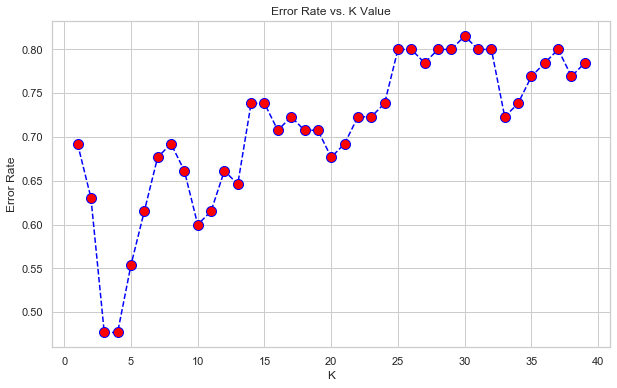

In [184]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after around K>=3 or 4 the error rate going upwards! K =3, 4 is perfect

In [185]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[11  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  2  8  4  1]
 [ 0  0  0  0  8  5]
 [ 0  0  0  4  0  3]
 [ 0  0  0  4  8  0]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         7
           3       1.00      0.13      0.24        15
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        12

    accuracy                           0.31        65
   macro avg       0.50      0.36      0.37        65
weighted avg       0.51      0.31      0.33        65



In [188]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[11  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  6  0  0]
 [ 0  0  7  4  2  0]
 [ 0  0  2  2  1  2]
 [ 0  0  2  5  3  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         7
           3       0.45      0.60      0.51        15
           4       0.24      0.31      0.27        13
           5       0.17      0.14      0.15         7
           6       0.50      0.17      0.25        12

    accuracy                           0.52        65
   macro avg       0.56      0.54      0.53        65
weighted avg       0.54      0.52      0.51        65



# Summary 

Net rent position (27A):  Table 27A we saw the number of individuals who has overall net rent loss and has single property interest are increasing over the years. But After 2010 it was getting flatter until 2015.  We did not see any seasonality in that data set and data was stationary. Other than single property interest when it comes to multiple property interest (more than two) the number of individual those who has overall net loss their number was constant in almost all the years.  The data was stationary non seasonal. Later we used Linear Regression, ARMA, ARIMA and KNN to predict number of individuals for 3 years in future.